<h1>Clustering Metode K-Means</h1>
<h4>2009106073 - Ricky Novenda Putra</h4>
<h4>2009106078 - Al Ikhwan Shafa</h4>
<h4>2009106084 - Sebastian Parande</h4>

<h2>Import Package Library</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

#Data Cleaning
from sklearn.impute import SimpleImputer

#K-Means
from sklearn.cluster import KMeans

<h2>Import Datasaet</h2>
<h4>Melihat dan mengeksplorasi data untuk mendapatkan wawasan tentang data. dengan begitu kita dapat memahami data lebih baik.</h4>

In [1]:
df = pd.read_csv('LD2011_2014.csv', parse_dates=True, sep=';', decimal=',', index_col=0)
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values
df

NameError: name 'pd' is not defined

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0 MB


In [4]:
df.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


In [5]:
df.dtypes

MT_001    float64
MT_002    float64
MT_003    float64
MT_004    float64
MT_005    float64
           ...   
MT_366    float64
MT_367    float64
MT_368    float64
MT_369    float64
MT_370    float64
Length: 370, dtype: object

<h2>Data Preprocessing</h2>
<h4>Data preprocessing adalah teknik yang digunakan untuk mengubah data mentah dalam format yang berguna dan efisien. Hal ini diperlukan karena data mentah seringkali tidak lengkap dan memiliki format yang tidak konsisten.</h4>

<h2>Data Cleaning</h2>

In [6]:
df.isnull().sum()

MT_001    0
MT_002    0
MT_003    0
MT_004    0
MT_005    0
         ..
MT_366    0
MT_367    0
MT_368    0
MT_369    0
MT_370    0
Length: 370, dtype: int64

<h2>Mean</h2>

In [7]:
dataset_mn = df.copy()
imputer_mean = SimpleImputer(strategy='mean')

In [8]:
dataset_mn.dropna(inplace=True)
dataset_mn.isna().sum()

MT_001    0
MT_002    0
MT_003    0
MT_004    0
MT_005    0
         ..
MT_366    0
MT_367    0
MT_368    0
MT_369    0
MT_370    0
Length: 370, dtype: int64

<h2>Data Duplikat</h2>

In [9]:
dataset_duplicate = df.copy()
dataset_duplicate.duplicated().sum()

0

<h2>Data Encoding</h2>
<h4>adalah teknik yang di gunakan untuk mengubah variabel kategorikal menjadi variabel numerik.</h4>

<h2>clustering K-Means</h2>
<h4>Algoritma ini menemukan kelompok data dengan nilai squared error antara rata-rata empiris dari cluster dan point di cluster minimum. Algoritma ini termasuk dalam clustering dengan pendekatan partitional. Setiap cluster berhubungan dengan centroid (point tengah). Setiap point dimasukkan pada cluster dengan centroid terdekat. Pada algoritma ini nilai K == cluster harus ditentukan.</h4>

In [10]:
modelKM = KMeans(n_clusters=3)
modelKM.fit(dataset_mn)

KMeans(n_clusters=3)

<h4>Mendapatkan hasil label dari pengelompokkan model k-means</h4>

In [11]:
label = modelKM.labels_
label

array([0, 0, 0, ..., 0, 0, 0])

<h4>Membuat prediksi dari dataframe menggunakan metode/model k-means</h4>

In [12]:
modelKM.predict(dataset_mn)

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
X = df.iloc[:,0]
Y = df.iloc[:,1]

In [14]:
centroid = modelKM.cluster_centers_
centroid

array([[2.73821718e+00, 1.32223909e+01, 2.53896674e+00, ...,
        5.29228637e+01, 4.03131265e+02, 6.11361809e+03],
       [5.28352483e+00, 2.81899384e+01, 4.14850927e+00, ...,
        1.44194953e+02, 8.24826051e+02, 1.11058307e+04],
       [5.63342980e+00, 3.21784317e+01, 1.77779123e+00, ...,
        1.41084988e+02, 9.98857370e+02, 1.30311743e+04]])

In [15]:
centroid_X = centroid[:,0]
centroid_Y = centroid[:,1]

<h4>Menampilkan scatter plot biasa tidak menggunakan hasil potongan dan centroid antar x dan y</h4>

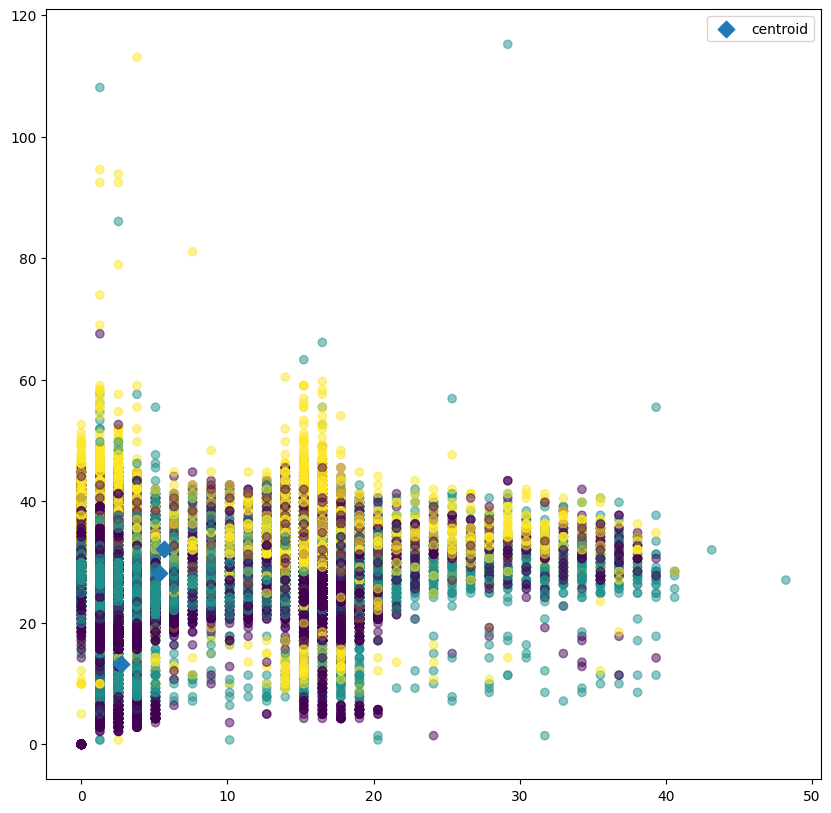

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(X, Y, alpha=0.5, c=label)
plt.scatter(centroid_X, centroid_Y, marker='D', s=70, label='centroid')
plt.legend()
plt.show()

<h4>Mengukur jumlah cluster Menggunakan metode elbow pada k-means, untuk menemukan jumlah cluster yang optimal</h4>

In [17]:
point = dataset_mn

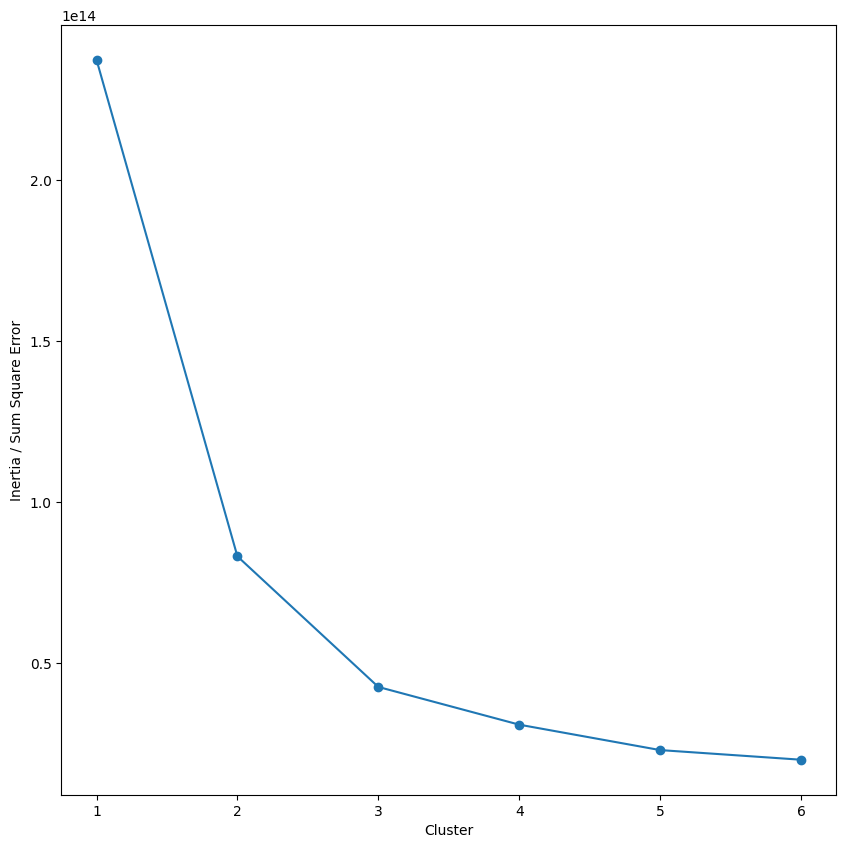

In [19]:
cluster_range = range(1,7)
inertias = []

for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(point)
    inertias.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(cluster_range, inertias, '-o')
plt.xlabel('Cluster')
plt.ylabel('Inertia / Sum Square Error')
plt.xticks(cluster_range)
plt.show()